In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# https://www.kaggle.com/datasets/amjadzhour/car-price-prediction/data

In [64]:
df = pd.read_csv("Car_Price_Prediction.csv")

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          1000 non-null   object 
 1   Model         1000 non-null   object 
 2   Year          1000 non-null   int64  
 3   Engine Size   1000 non-null   float64
 4   Mileage       1000 non-null   int64  
 5   Fuel Type     1000 non-null   object 
 6   Transmission  1000 non-null   object 
 7   Price         1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [66]:
df.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657


In [67]:
df['Year'].unique()

array([2015, 2014, 2006, 2004, 2000, 2018, 2021, 2016, 2007, 2001, 2019,
       2017, 2010, 2009, 2003, 2012, 2008, 2002, 2020, 2011, 2005, 2013])

In [68]:
df['Make'].unique()

array(['Honda', 'Ford', 'BMW', 'Audi', 'Toyota'], dtype=object)

In [69]:
df.groupby('Model')['Price'].mean().sort_index()


Model
Model A    24762.819260
Model B    25190.793814
Model C    25251.013418
Model D    25274.265831
Model E    25209.726261
Name: Price, dtype: float64

In [70]:
df["Transmission"]=df["Transmission"].map({"Manual" : 0 , "Automatic" : 1})

In [71]:
# Encoding
df = pd.get_dummies(
    df, 
    columns=[ "Make", "Fuel Type", "Model"], 
    prefix=[ "Make", "Fuel", "Model"], 
    drop_first=[False, False, False]
)
df.head()


,Year,Engine Size,Mileage,Transmission,Price,Make_BMW,Make_Ford,Make_Honda,Make_Toyota,Fuel_Electric,Fuel_Petrol,Model_Model B,Model_Model C,Model_Model D,Model_Model E
0,2015,3.9,74176,0,30246.207931,False,False,True,False,False,True,True,False,False,False
1,2014,1.7,94799,1,22785.747684,False,True,False,False,True,False,False,True,False,False
2,2006,4.1,98385,0,25760.290347,True,False,False,False,True,False,True,False,False,False
3,2015,2.6,88919,1,25638.003491,False,False,True,False,True,False,True,False,False,False
4,2004,3.4,138482,1,21021.386657,False,False,True,False,False,True,False,True,False,False


In [72]:
df['Age'] = 2022 - df['Year']
df = df.drop("Year",axis=1)

In [73]:
df = df.astype(float)

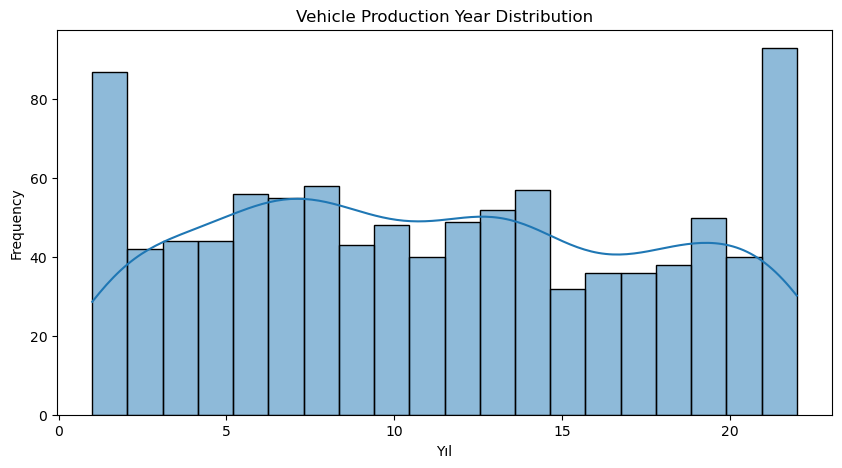

In [74]:
# Year and Age Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Vehicle Production Year Distribution')
plt.xlabel('Yıl')
plt.ylabel('Frequency')
plt.show()

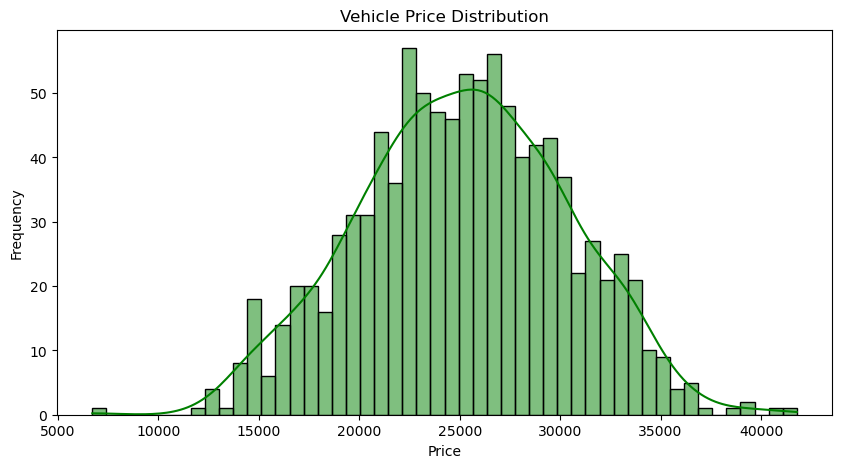

In [75]:
# Price Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Price'], kde=True, bins=50, color='green')
plt.title('Vehicle Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


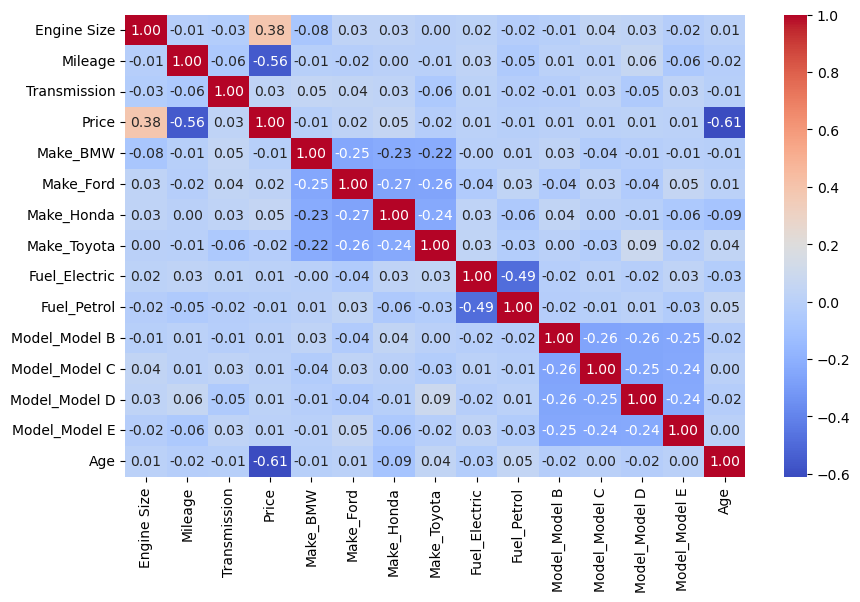

In [76]:
# Correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


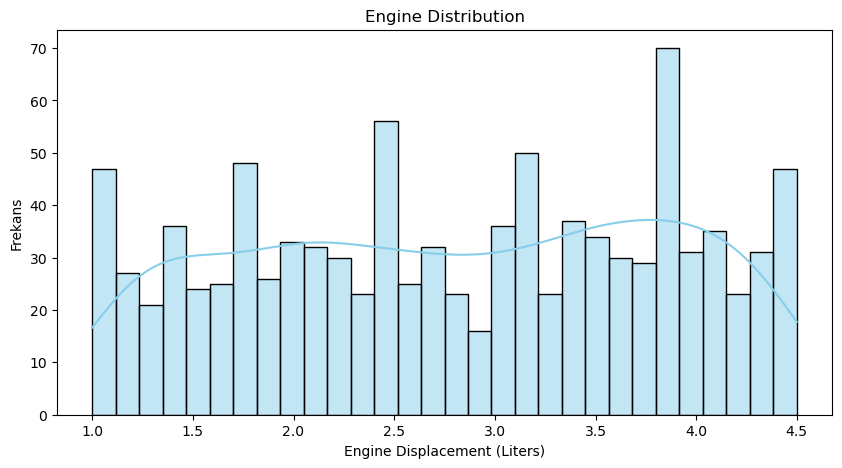

In [77]:
# engine volume distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Engine Size'], kde=True, bins=30, color='skyblue')
plt.title('Engine Distribution')
plt.xlabel('Engine Displacement (Liters)')
plt.ylabel('Frekans')
plt.show()


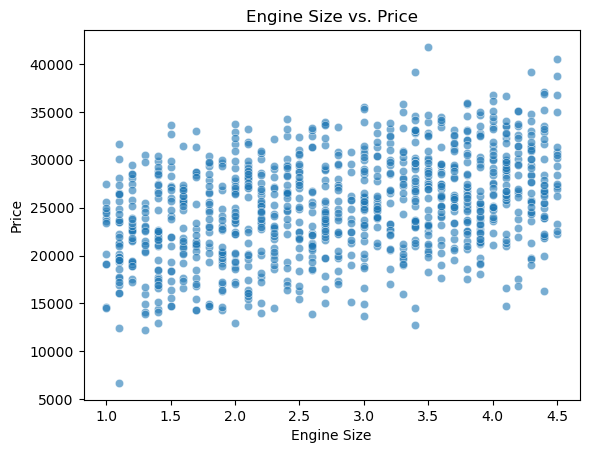

In [78]:
# engine size vs price
sns.scatterplot(x='Engine Size', y='Price', data=df, alpha=0.6)
plt.title('Engine Size vs. Price')
plt.show()


In [79]:
#dependent & independent feature 
X = df.drop('Price', axis= 1)
y = df['Price']

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=15)

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [83]:
def calculate_model_metrics(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [84]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso": Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors Regressor"  : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor()
}

In [85]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = calculate_model_metrics(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = calculate_model_metrics(y_test, y_test_pred)

    print(list(models.values())[i])

    print("Evaluation for Training Set")
    print("RMSE :", model_train_rmse)
    print("Mean Absolute Error :", model_train_mae)
    print("R2 Score :", model_train_r2)

    print("-----------------------------")
    
    print("Evaluation for Test Set")
    print("RMSE :", model_test_rmse)
    print("Mean Absolute Error :", model_test_mae)
    print("R2 Score :", model_test_r2)

    print("-----------------------------")
    print("\n")

LinearRegression()
Evaluation for Training Set
RMSE : 2105.0774587618753
Mean Absolute Error : 1658.6906222756697
R2 Score : 0.8350404978786872
-----------------------------
Evaluation for Test Set
RMSE : 1976.7863546690896
Mean Absolute Error : 1585.2729679198687
R2 Score : 0.852647033217468
-----------------------------


Lasso()
Evaluation for Training Set
RMSE : 2105.0819605423912
Mean Absolute Error : 1658.696507160911
R2 Score : 0.8350397923347999
-----------------------------
Evaluation for Test Set
RMSE : 1975.792765762447
Mean Absolute Error : 1584.4134202502855
R2 Score : 0.8527951235544275
-----------------------------


Ridge()
Evaluation for Training Set
RMSE : 2105.0877336330273
Mean Absolute Error : 1658.5295604858725
R2 Score : 0.8350388875419663
-----------------------------
Evaluation for Test Set
RMSE : 1976.2900625648474
Mean Absolute Error : 1584.5985356430058
R2 Score : 0.8527210128195153
-----------------------------


KNeighborsRegressor()
Evaluation for Trainin

In [86]:
#hyperparameter tuning

lasso_params = {
    "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    "max_iter": [1000, 5000, 10000],
    "tol": [1e-4, 1e-3, 1e-2]
}

ridge_params = {
    "alpha": [0.1, 1, 10, 50, 100, 200],
    "solver": ["auto", "svd", "cholesky", "lsqr", "sag", "saga"],
    "tol": [1e-4, 1e-3, 1e-2]
}

linear_params = {
        "fit_intercept": [True, False],
        "positive": [True, False],
}

In [87]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [88]:
randomcv_models = [
    ("Lasso", Lasso(), lasso_params),
    ("Ridge", Ridge(), ridge_params),
    ("Linear", LinearRegression(), linear_params),
    
        ]

In [89]:
for name, model, params in randomcv_models:
    randomcv = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter = 100, cv = 3, n_jobs = -1)
    randomcv.fit(X_train, y_train)
    print("best params for :", name, randomcv.best_params_)

best params for : Lasso {'tol': 0.0001, 'max_iter': 1000, 'alpha': 100}


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 63 is smaller than n_iter=100. Running 63 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


best params for : Ridge {'tol': 0.01, 'solver': 'sag', 'alpha': 1}
best params for : Linear {'positive': False, 'fit_intercept': True}


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [90]:
for name, model, params in randomcv_models:
    gridcv = GridSearchCV(estimator=model,param_grid=params, cv = 3, n_jobs = -1)
    gridcv.fit(X_train, y_train)
    print("best params for :", name, gridcv.best_params_)

best params for : Lasso {'alpha': 100, 'max_iter': 1000, 'tol': 0.0001}
best params for : Ridge {'alpha': 0.1, 'solver': 'sag', 'tol': 0.01}
best params for : Linear {'fit_intercept': True, 'positive': False}


In [91]:
models = {

    "Lasso Regression" : Lasso(alpha=100,max_iter=1000,tol=0.0001),
    "Ridge Regression" : Ridge(alpha=0.1,solver="sag",tol=0.01),
    "Linear Regression" : LinearRegression(fit_intercept=True,positive=False)

}


In [92]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = calculate_model_metrics(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = calculate_model_metrics(y_test, y_test_pred)

    print(list(models.values())[i])

    print("Evaluation for Training Set")
    print("RMSE :", model_train_rmse)
    print("Mean Absolute Error :", model_train_mae)
    print("R2 Score :", model_train_r2)

    print("-----------------------------")
    
    print("Evaluation for Test Set")
    print("RMSE :", model_test_rmse)
    print("Mean Absolute Error :", model_test_mae)
    print("R2 Score :", model_test_r2)

    print("-----------------------------")
    print("\n")

LinearRegression()
Evaluation for Training Set
RMSE : 2105.0774587618753
Mean Absolute Error : 1658.6906222756697
R2 Score : 0.8350404978786872
-----------------------------
Evaluation for Test Set
RMSE : 1976.7863546690896
Mean Absolute Error : 1585.2729679198687
R2 Score : 0.852647033217468
-----------------------------


Lasso(alpha=100, tol=0.01)
Evaluation for Training Set
RMSE : 2123.702343067929
Mean Absolute Error : 1671.9467209922802
R2 Score : 0.8321085933074226
-----------------------------
Evaluation for Test Set
RMSE : 1939.1331539147686
Mean Absolute Error : 1557.6076010199279
R2 Score : 0.8582070367987501
-----------------------------


Ridge(alpha=0.1, solver='sag', tol=0.01)
Evaluation for Training Set
RMSE : 2105.749518298329
Mean Absolute Error : 1659.4714974699175
R2 Score : 0.834935152298297
-----------------------------
Evaluation for Test Set
RMSE : 1972.7920612982996
Mean Absolute Error : 1579.2205720722966
R2 Score : 0.8532419142413145
-------------------------